In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


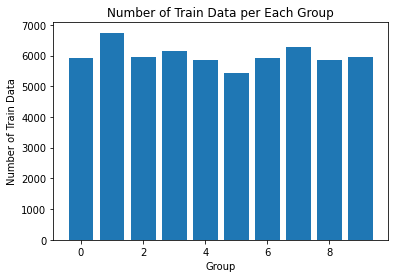

In [ ]:
import matplotlib.pyplot as plt
group_dict = {} #Create an empty dictionary to count the number of train data per each group

# Loop through train_labels and add train data to corresponding groups in the dictionary
for label in train_labels:
    if label not in group_dict:
        group_dict[label] = 1
    else:
        group_dict[label] += 1

# Create a bar chart using plt.bar() method
plt.bar(list(group_dict.keys()), list(group_dict.values()))
plt.xlabel('Group')
plt.ylabel('Number of Train Data')
plt.title('Number of Train Data per Each Group')
plt.show()

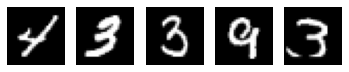

In [ ]:
import random
# randomly select 5 images
image_ids = random.sample(range(len(train_images)), 5)

# display the images
for i in range(len(image_ids)):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[image_ids[i]], cmap='gray')
    plt.axis('off')

plt.show()

In [ ]:
# normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
num_pixels = train_images.shape[1] * train_images.shape[2]
print("Number of pixels per sample:", num_pixels)

Number of pixels per sample: 784


In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import History
import matplotlib.pyplot as plt

# Prepare the input data for training
input_data = train_images.reshape((train_images.shape[0], 784)).astype('float32') / 255.

optional_neurons = 500

# Build Encoder
input_layer  = Input(shape=(784,))
hidden_layer1 = Dense(units=500, activation='relu')(input_layer)
hidden_layer2 = Dense(units=optional_neurons, activation='relu')(hidden_layer1)
encoded = Dense(units=30, activation='relu')(hidden_layer2)
model_encoder = Model(input_layer, encoded)

# Build Decoder
input_layer_dec = Input(shape=(30,))
hidden_layer1_dec = Dense(units=100, activation='relu')(input_layer_dec)
hidden_layer2_dec = Dense(units=optional_neurons, activation='relu')(hidden_layer1_dec)
decoded = Dense(units=784, activation='sigmoid')(hidden_layer2_dec)
model_decoder = Model(input_layer_dec, decoded)

# Build Autoencoder
model_ae_input = Input(shape=(784,))
model_ae_encoder = model_encoder(model_ae_input)
model_ae_decoder = model_decoder(model_ae_encoder)
model_ae = Model(model_ae_input, model_ae_decoder)

# Compile the Model
model_ae.compile(optimizer='adam', loss='binary_crossentropy')

# Train the Model
history = History()
model_ae.fit(input_data, input_data, epochs=30, batch_size=256, shuffle=True, validation_split=0.1, callbacks=[history])

1875/1875 [==============================] - 6s 3ms/step
Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 1.4510 - accuracy: 0.5383 - val_loss: 1.1823 - val_accuracy: 0.6175
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 1.1527 - accuracy: 0.6182 - val_loss: 1.0765 - val_accuracy: 0.6487
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 1.0503 - accuracy: 0.6543 - val_loss: 0.9838 - val_accuracy: 0.6785
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.9706 - accuracy: 0.6789 - val_loss: 0.9237 - val_accuracy: 0.6971
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.9105 - accuracy: 0.6987 - val_loss: 0.8688 - val_accuracy: 0.7138
Epoch 6/10
375/375 [==============================] - 2s 7ms/step - loss: 0.8669 - accuracy: 0.7115 - val_loss: 0.8328 - val_accuracy: 0.7244
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.8315 - accuracy

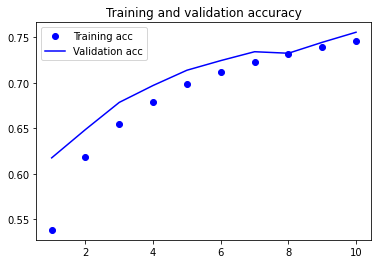

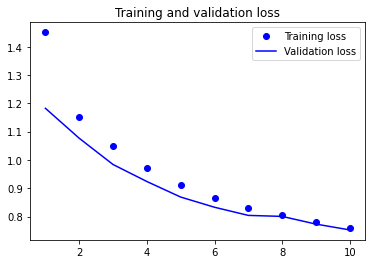

313/313 [==============================] - 1s 2ms/step - loss: 0.7631 - accuracy: 0.7491
Accuracy: 74.91
313/313 [==============================] - 1s 1ms/step


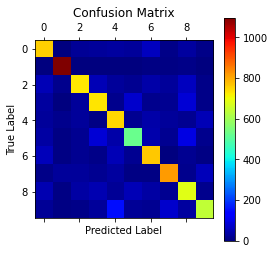

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model, Sequential
# Load the MNIST dataset and preprocess it
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 784))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the autoencoder model
input_layer = Input(shape=(784,))
hidden_layer1 = Dense(units=500, activation='relu')(input_layer)
hidden_layer2 = Dense(units=256, activation='relu')(hidden_layer1)
encoded = Dense(units=30, activation='relu')(hidden_layer2)
model_encoder = Model(input_layer, encoded)

# Define the classifier model
classifier = Sequential()
classifier.add(Dense(units=256, activation='relu', input_shape=(30,)))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=10, activation='softmax'))
classifier.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the classifier
history = classifier.fit(model_encoder.predict(train_images), train_labels, epochs=10, batch_size=128, validation_split=0.2)

# Plot the accuracy, validation accuracy, loss and validation loss
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Evaluate the classifier's accuracy
_, accuracy = classifier.evaluate(model_encoder.predict(test_images), test_labels)
print('Accuracy: %.2f' % (accuracy*100))

# Plot the confusion matrix
y_pred = np.argmax(classifier.predict(model_encoder.predict(test_images)), axis=1)
y_true = np.argmax(test_labels, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.matshow(cm, cmap=plt.cm.jet)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()